# Lecture 7 notes 

In [1]:
import pandas as pd
import numpy as np
rng = np.random.default_rng(12345)

In [6]:
s = pd.Series([3,5,7], index=['a','b','c'])
s['b']

np.int64(5)

In [14]:
s = pd.Series(range(5), index=[4, 2, 7, 0, 1])
s.iloc[0]

np.int64(0)

In [ ]:
s = pd.Series({'a': 3, 'b': 5, 'c': 7})
s.iloc[0:2]        # by position (excludes stop)

a    3
b    5
dtype: int64

In [20]:
s.loc['a':'c']     # by label (includes 'c')

a    3
b    5
c    7
dtype: int64

In [24]:
s = pd.Series({'a': 3, 'b': 5, 'c': 'hi'})  # dtype = 'O' (object)
[type(v) for v in s]
s['c']

'hi'

In [26]:
s1 = pd.Series(['apple', 'watermelon', 'orange', 'pear', 'cherry', 'strawberry'],
               index=list("abcdef"))
s2 = pd.Series(['apple', 'kiwi', 'orange', 'pear', 'cherry', 'grape'],
               index=list("abcdef"))
s3 = pd.Series(np.log(np.arange(0.1,10,.1)), index=np.arange(0.1,10,.1))
s4 = np.array([""])

s1.unique()

array(['apple', 'watermelon', 'orange', 'pear', 'cherry', 'strawberry'],
      dtype=object)

In [27]:
s1.str.upper()

a         APPLE
b    WATERMELON
c        ORANGE
d          PEAR
e        CHERRY
f    STRAWBERRY
dtype: object

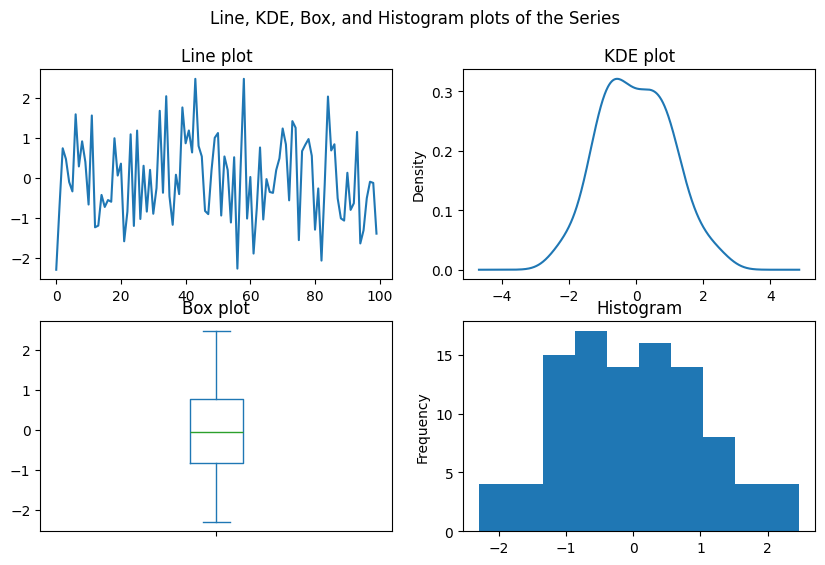

In [ ]:
import matplotlib.pyplot as plt 

s = pd.Series(rng.standard_normal(100))

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
s.plot(kind='line', ax=axes[0,0]); axes[0,0].set_title("Line plot")
s.plot(kind='kde', ax=axes[0,1]); axes[0,1].set_title("KDE plot")
s.plot(kind='box', ax=axes[1,0]); axes[1,0].set_title("Box plot")
s.plot(kind='hist', ax=axes[1,1]); axes[1,1].set_title("Histogram")
fig.suptitle("Line, KDE, Box, and Histogram plots of the Series")
plt.show() 


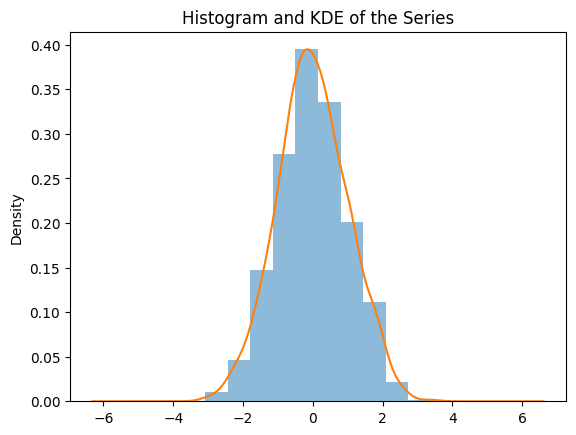

In [36]:
s = pd.Series(rng.standard_normal(1000))
s.plot(kind='hist', alpha=0.5, density=True)
s.plot(kind='kde')
plt.title("Histogram and KDE of the Series")
plt.show()

In [34]:
s.describe()
# Count, mean, std, min, 25%, 50%, 75%, max

count    1000.000000
mean        0.051547
std         1.026454
min        -3.119609
25%        -0.631030
50%         0.055645
75%         0.731863
max         3.461976
dtype: float64

In [66]:
s1 = pd.Series([1,2,3])
s2 = pd.Series([4,5,6])
s3 = pd.concat([s1, s2])  # Combine into new Series
s3.reset_index(drop=True, inplace=True) # Reset index (drop old index)
s3


0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [68]:
s3 = pd.concat([s1, s2])  # Combine into new Series
s3 = s3[s3>4]
s3

1    5
2    6
dtype: int64

In [ ]:
s = pd.Series(['a', 'b', 'c', 'a', 'b', 'c', 'd'])
s1 = pd.Categorical(s, categories=['b', 'a', 'd'])


s2 = pd.Series(s, dtype='category')              # general use (Series)
s2 = s.astype('category')

(0    a
 1    b
 2    c
 3    a
 4    b
 5    c
 6    d
 dtype: object,
 0    a
 1    b
 2    c
 3    a
 4    b
 5    c
 6    d
 dtype: category
 Categories (4, object): ['a', 'b', 'c', 'd'])

In [81]:
s1.categories
s2.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

# Data frames 

In [85]:
df = pd.DataFrame([[3, 'a'], [5, 'b'], [7, 'c']],
                  columns=['x', 'y'])

df1 = pd.DataFrame({'x': [3, 5, 7],
                   'y': ['a', 'b', 'c']})
df

,x,y
0,3,a
1,5,b
2,7,c


In [86]:
df1

,x,y
0,3,a
1,5,b
2,7,c


<Axes: title={'center': 'Scatterplot of carat vs price'}, xlabel='carat', ylabel='price'>

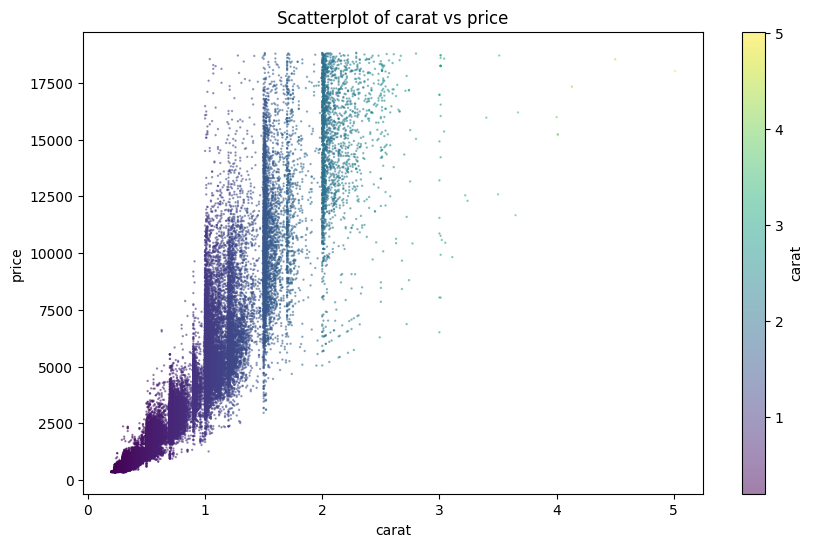

In [92]:
diamonds = pd.read_csv("data/diamonds.csv")
# scatterplot of carat vs price
diamonds.plot.scatter(x='carat', y='price', c='carat', s=.5,
                      figsize=(10,6), title="Scatterplot of carat vs price", alpha=0.5)

In [176]:

df = pd.DataFrame({'x': rng.standard_normal(10), 'y': rng.standard_normal(10)}) # x and y two random variables
df 

,x,y
0,-1.359142,1.320468
1,-0.789773,-2.090926
2,-1.102499,-0.461356
3,1.225478,0.380056
4,-0.284008,-0.796671
5,1.406760,0.089751
6,-0.165332,-0.327655
7,-0.956569,1.423878
8,0.162121,1.250627
9,0.175067,-2.122785


In [110]:
df.loc[1]

x   -1.034335
y   -0.018485
Name: 1, dtype: float64

In [117]:
df.loc[1:3, 'x':'y']     

,x,y
1,-1.034335,-0.018485
2,-0.483851,-0.580009
3,0.973375,-0.177390


In [123]:
df.loc[df.x > df.y, 'x':'y'] 
df.loc[1:3, 'x':'y']

,x,y
1,-1.034335,-0.018485
2,-0.483851,-0.580009
3,0.973375,-0.177390


In [133]:
df.iloc[0, 1]
df.iloc[1:3, 0:2]

,x,y
1,-1.034335,-0.018485
2,-0.483851,-0.580009


In [149]:
s1 = df[0::2]['y']
s1

0    0.096875
2    1.172025
4    1.430618
6   -0.879600
8   -1.598246
Name: y, dtype: float64

In [150]:
s2 = df.loc[0::2, 'y']
s2

0    0.096875
2    1.172025
4    1.430618
6   -0.879600
8   -1.598246
Name: y, dtype: float64

In [151]:
s1.equals(s2)

True

In [182]:
df.loc[0::2, 'y'] = -2 

In [184]:
df

,x,y
0,-1.359142,-2.000000
1,-0.789773,-2.090926
2,-1.102499,-2.000000
3,1.225478,0.380056
4,-0.284008,-2.000000
5,1.406760,0.089751
6,-0.165332,-2.000000
7,-0.956569,1.423878
8,0.162121,-2.000000
9,0.175067,-2.122785


In [185]:
s = pd.Series(["0", float('nan'), np.nan, 2, None])
[type(v) for v in s]  # shows types in Series with mixed missing values


[str, float, float, int, NoneType]

In [186]:
df = pd.DataFrame({
    "s": [1, np.nan, 3, None, 5],
    "t": ["a", np.nan, "c", None, "e"]
})
df['s'].dtype, df['t'].dtype  # mixed types

(dtype('float64'), dtype('O'))

In [ ]:
s.isna()
s[s.notna()]


0     True
1    False
2    False
3     True
4    False
dtype: bool

In [191]:
diamonds = pd.read_csv("data/diamonds.csv") # read diamonds.cs

In [192]:
grp = diamonds[diamonds.columns.drop(['color'])].groupby(['cut', 'clarity'], as_index=False) #

In [195]:
grp.ngroups
grp.agg({'price': 'mean', 'carat': 'sum'})

,cut,clarity,price,carat
0,Fair,I1,3703.533333,285.81
1,Fair,IF,1912.333333,4.27
2,Fair,SI1,4208.279412,393.57
3,Fair,SI2,5173.916309,560.99
4,Fair,VS1,4165.141176,149.57
5,Fair,VS2,4174.724138,231.05
6,Fair,VVS1,3871.352941,11.30
7,Fair,VVS2,3349.768116,47.72
8,Good,I1,3596.635417,115.49
9,Good,IF,4098.323944,43.76


In [ ]:
grp = diamonds[diamonds.columns.drop(['color'])].groupby(['cut', 'clarity'], as_index=False) #
grp.ngroups
grp.agg({'price': 'mean', 'carat': 'sum'})